In [50]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import os

In [51]:
input_file = 'Tory Lanez - Lavender Sunflower.wav' #change this to your desire audio
r = 20  # change rank here (How much u want to compresse)

In [52]:
# load/read audio using "librosa"
audio, sr = librosa.load(input_file, sr=None)
D = librosa.stft(audio) # Compute the Short-Time Fourier Transform (STFT) or frequency content of the audio signal

In [53]:
# Perform SVD-based calculation on the STFT matrix
U, S, Vt = np.linalg.svd(D, full_matrices=False)
S = np.diag(S) # Convert singular values into a diagonal matrix

In [54]:
# Reconstruct the compressed STFT matrix using only the first 'r' singular values
D_compressed = U[:, :r] @ S[:r, :r] @ Vt[:r, :]

In [55]:
# Convert the compressed STFT back to an audio signal using Inverse STFT
compressed_audio = librosa.istft(D_compressed)

In [56]:
# Save the compressed audio as an MP3 file
output_file = "r=20.mp3"
sf.write(output_file, compressed_audio, sr)
print(f"Compressed audio saved as {output_file}")

Compressed audio saved as r=20.mp3


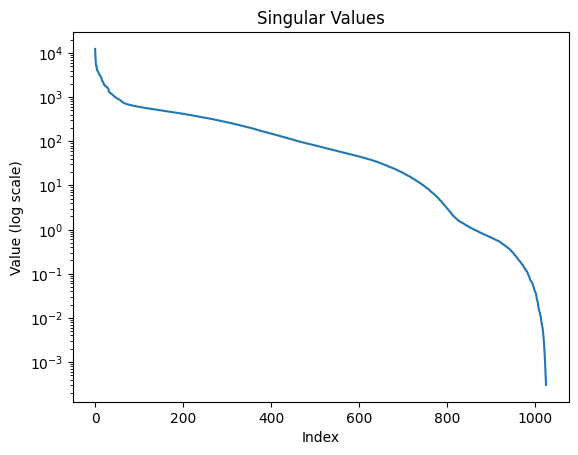

In [57]:
# Plot the singular values (log scale) to show importance of each component
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Value (log scale)")
plt.show()

In [58]:
# Compare File Sizes
original_size = os.path.getsize(input_file) / 1024  # KB
compressed_size = os.path.getsize(output_file) / 1024  # KB
    
print(f"Original file size: {original_size:.2f} KB")
print(f"Compressed file size: {compressed_size:.2f} KB")
print(f"Compression ratio: {(compressed_size / original_size) * 100:.2f}%")

Original file size: 28476.22 KB
Compressed file size: 1445.39 KB
Compression ratio: 5.08%


In [59]:
# Compare waveforms of original and compressed audio
plt.figure(figsize=(12, 4))
plt.plot(librosa.times_like(audio), audio, label='Original', alpha=0.7)
plt.plot(librosa.times_like(compressed_audio), compressed_audio, label='Compressed', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Comparison")
plt.legend()
plt.show()

c:\Users\User\Documents\SVD Projects\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

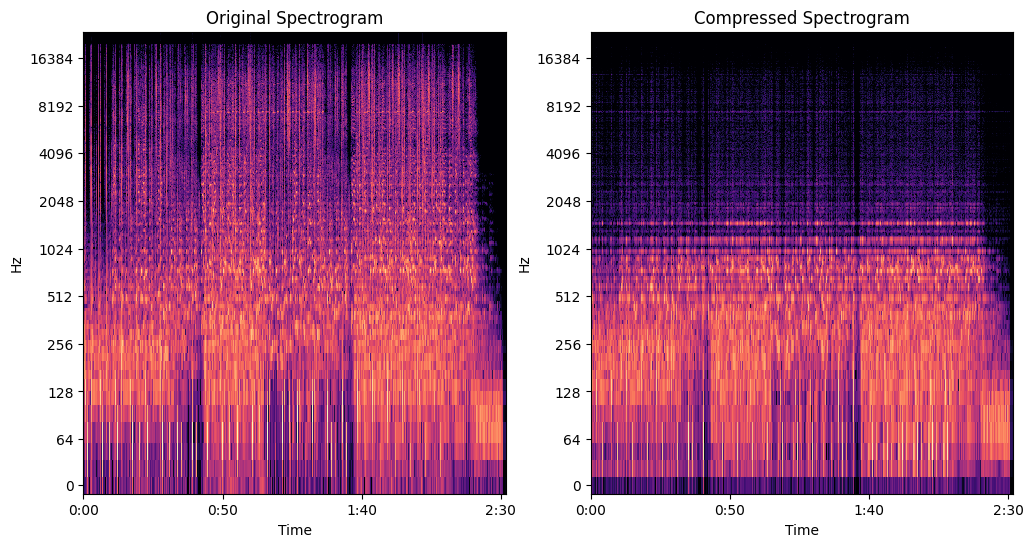

In [47]:
# Compare spectrograms of original and compressed audio
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title("Original Spectrogram")

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_compressed), ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title("Compressed Spectrogram")

plt.show()

Text(0.5, 1.0, 'Cumulative Sum (Energy graph)')

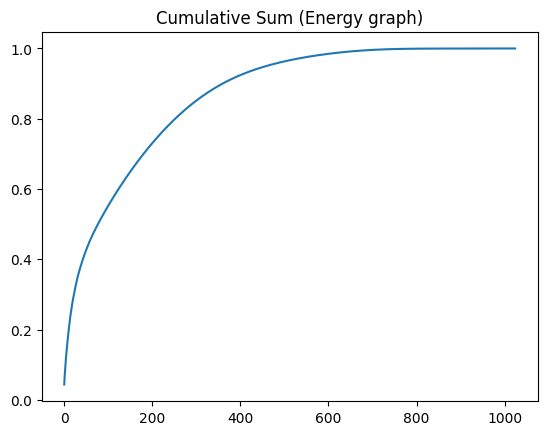

In [62]:
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.show
plt.title("Cumulative Sum (Energy graph)")